In [8]:
# Import necessary libraries
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

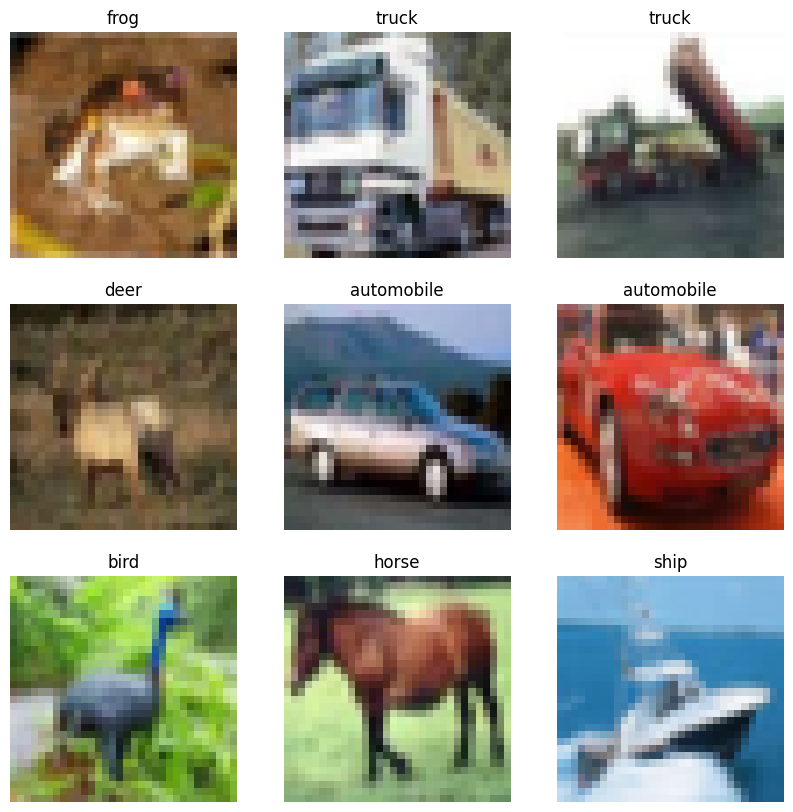

In [9]:
# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Plot a few images from the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting a few sample images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3,3, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [10]:
# Preprocessing data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

n_classes = 10

# One-hot encode the labels
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)


In [11]:
# Building the CNN model
model = Sequential()

model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Hidden layers
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [12]:
# Callbacks for early stopping and reducing learning rate
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

In [13]:
# Train the model
history = model.fit(X_train, Y_train, batch_size=128, epochs=40, validation_data=(X_test, Y_test),
                    callbacks=[early_stop, reduce_lr])

Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.3037 - loss: 1.8756 - val_accuracy: 0.5339 - val_loss: 1.2905 - learning_rate: 0.0010
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.5812 - loss: 1.1838 - val_accuracy: 0.6805 - val_loss: 0.9199 - learning_rate: 0.0010
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6719 - loss: 0.9463 - val_accuracy: 0.7096 - val_loss: 0.8287 - learning_rate: 0.0010
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7120 - loss: 0.8188 - val_accuracy: 0.7351 - val_loss: 0.7529 - learning_rate: 0.0010
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.7431 - loss: 0.7303 - val_accuracy: 0.7381 - val_loss: 0.7470 - learning_rate: 0.0010
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.7688 - loss: 0.6628 - val_accuracy: 0.7613 - val_loss: 0.6866 - learning_rate: 0.0010
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7936 - los

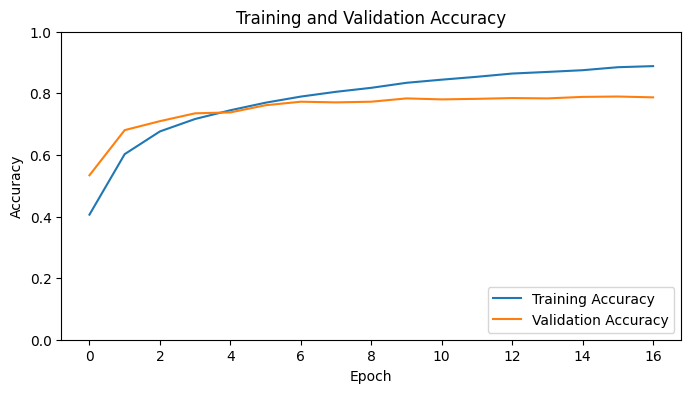

In [14]:
# Plotting training and validation accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.savefig('accuracy_plot.png')
plt.show()


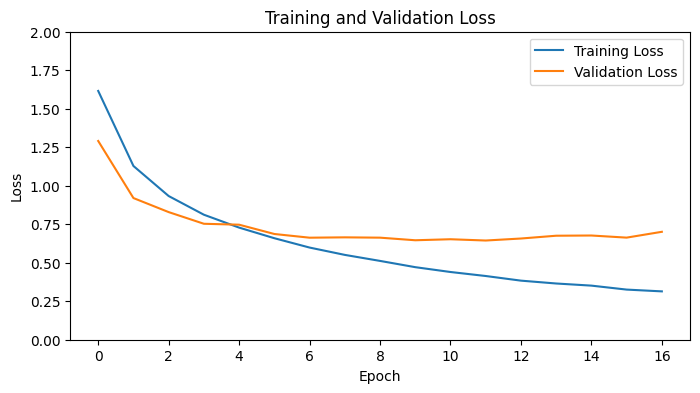

In [15]:
# Plotting training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('loss_plot.png')
plt.show()


In [16]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Test Accuracy: 78.21%


In [17]:
# Save the trained model
model.save('class_img.h5')

# Load the saved model for prediction
model = load_model('class_img.h5')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Plotting learning rate if using ReduceLROnPlateau
plt.figure(figsize=(8, 4))
plt.plot(history.history['lr'], label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Over Epochs')
plt.legend()
plt.show()


In [19]:
# Predicting real time image

from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Function to preprocess larger input images
def preprocess_and_predict_image(image_path, model):
    img_width, img_height = 32, 32  # CIFAR-10 images are 32x32

    # Load the image with resizing to 32x32
    img = image.load_img(image_path, target_size=(img_width, img_height), interpolation='bilinear')
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)  # Reshape for model input
    img = img / 255.0  # Normalize the image like training data

    # Display the image
    plt.imshow(img[0])
    plt.axis('off')  # Hide axes
    plt.show()

    # Make the prediction
    predictions = model.predict(img)

    # Get the predicted class index and confidence
    predicted_class_index = np.argmax(predictions)
    confidence = np.max(predictions)

    # CIFAR-10 class names
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

    predicted_class_name = class_names[predicted_class_index]
    return predicted_class_name, confidence



In [ ]:
# Load the trained model
model = load_model('class_img.h5')

image_path = '/content/hdfc4.jpeg'  # Update with your image path
predicted_class, confidence = preprocess_and_predict_image(image_path, model)

print(f"Predicted class: {predicted_class} with confidence: {confidence * 100:.2f}%")
